In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import pandas as pd
import numpy as np

In [2]:
# Carregar os dados
historical_data = pd.read_csv('./data/historical.csv')
new_data = pd.read_csv('data/new_data.csv')

In [3]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Length of Username          2000 non-null   float64
 1   Country Block_1             2000 non-null   int64  
 2   Country Block_2             2000 non-null   int64  
 3   Number of Followers         2000 non-null   float64
 4   Number of Posts             2000 non-null   float64
 5   Number of Mutual Followers  2000 non-null   float64
 6   Percentage of Following     2000 non-null   float64
 7   Is Business Account         2000 non-null   int64  
 8   Class                       2000 non-null   int64  
 9   Sex                         2000 non-null   int64  
 10  Is Joined Recently          2000 non-null   int64  
 11  Is Verified                 2000 non-null   int64  
 12  Is Private                  2000 non-null   int64  
 13  Is Professional Account     2000 

In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Length of Username          2000 non-null   float64
 1   Country Block_1             2000 non-null   int64  
 2   Country Block_2             2000 non-null   int64  
 3   Number of Followers         2000 non-null   float64
 4   Number of Posts             2000 non-null   float64
 5   Number of Mutual Followers  2000 non-null   float64
 6   Percentage of Following     2000 non-null   float64
 7   Is Business Account         2000 non-null   int64  
 8   Sex                         2000 non-null   int64  
 9   Is Joined Recently          2000 non-null   int64  
 10  Is Verified                 2000 non-null   int64  
 11  Is Private                  2000 non-null   int64  
 12  Is Professional Account     2000 non-null   int64  
 13  Length of Biography         2000 

# Resolução do exercício 1

In [5]:
def perform_ks_test(df1, df2, variables):
    results = []
    for variable in variables:
        statistic, pvalue = ks_2samp(df1[variable], df2[variable])
        
        # Registrar os resultados
        if pvalue < 0.05:
            print(f"Para a variável '{variable}', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.")
            print(f"O 'drift' de dados foi detectado para a variável: {variable}\n")
            results.append([variable, statistic, pvalue, 'Rejeita H0'])
        else:
            print(f"Para a variável '{variable}', nós aceitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável não mudou de maneira significativa.")
            print(f"O 'drift' de dados não foi detectado para a variável: {variable}\n")
            results.append([variable, statistic, pvalue, 'Aceita H0'])
        
        # Verificar se a variância é diferente de zero
        if df1[variable].var() > 0 and df2[variable].var() > 0:
            # Se a variável for numérica, use um gráfico de densidade
            if df1[variable].nunique() > 2:
                sns.kdeplot(df1[variable], label='historical data', fill=True, color='blue')
                sns.kdeplot(df2[variable], label='new data', fill=True, color='orange')
                plt.title(f'K-S test for variable: {variable}')
                plt.legend()
                plt.show()
            # Se a variável for categórica, use um gráfico de barras
            else:
                df = pd.concat([df1[variable].value_counts(normalize=True).rename('historical data'), 
                                df2[variable].value_counts(normalize=True).rename('new data')], axis=1)
                df.plot(kind='bar', color=['blue', 'orange'])
                plt.title(f'Bar plot for variable: {variable}')
                plt.legend()
                plt.show()
                
    # Converter resultados para DataFrame
    results_df = pd.DataFrame(results, columns=['Variable', 'Statistic', 'P-value', 'H0 Hypothesis'])
    
    return results_df


Para a variável 'Length of Username', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.
O 'drift' de dados foi detectado para a variável: Length of Username



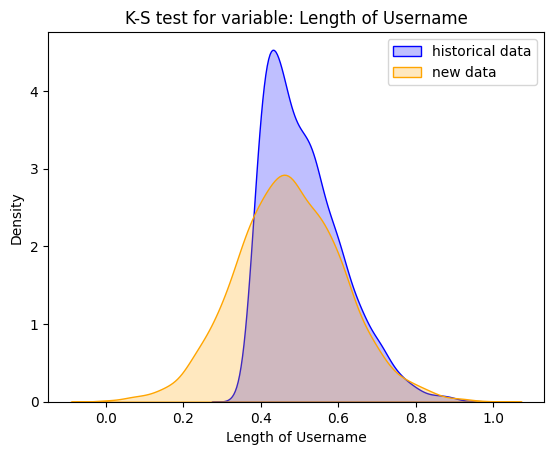

Para a variável 'Country Block_1', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.
O 'drift' de dados foi detectado para a variável: Country Block_1

Para a variável 'Country Block_2', nós aceitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável não mudou de maneira significativa.
O 'drift' de dados não foi detectado para a variável: Country Block_2



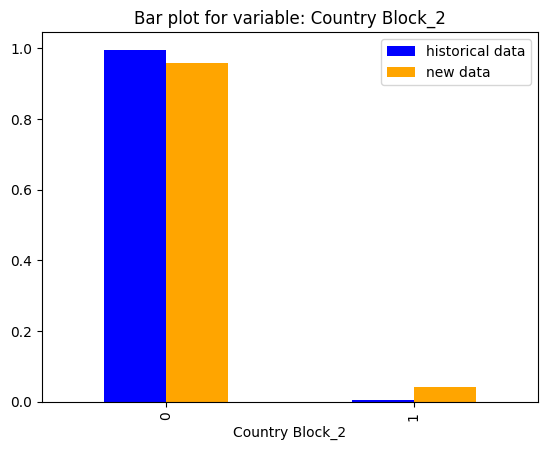

Para a variável 'Number of Followers', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.
O 'drift' de dados foi detectado para a variável: Number of Followers



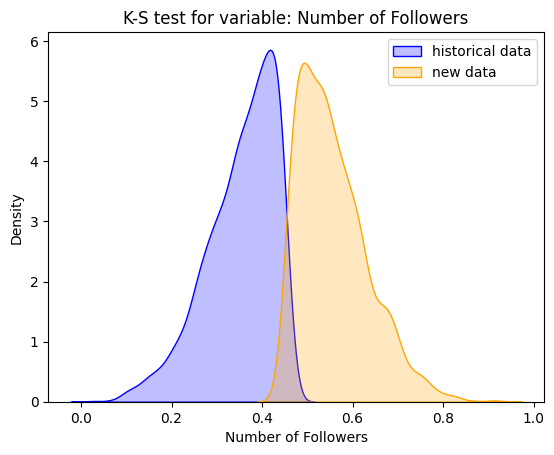

Para a variável 'Number of Posts', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.
O 'drift' de dados foi detectado para a variável: Number of Posts



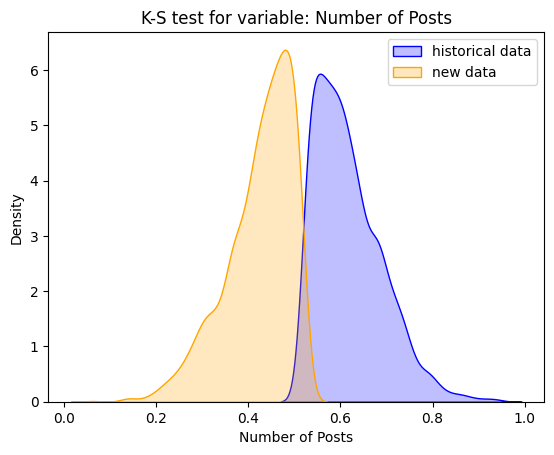

Para a variável 'Number of Mutual Followers', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.
O 'drift' de dados foi detectado para a variável: Number of Mutual Followers



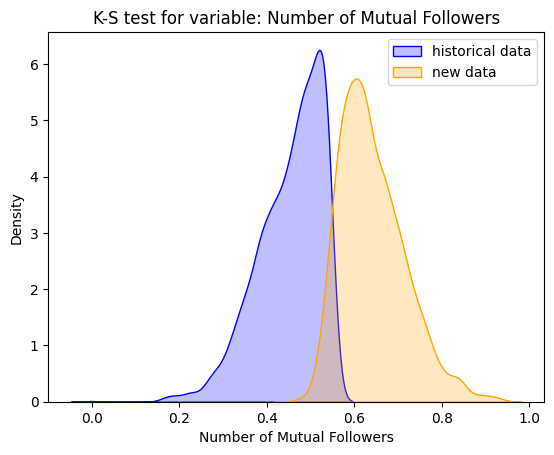

Para a variável 'Percentage of Following', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.
O 'drift' de dados foi detectado para a variável: Percentage of Following



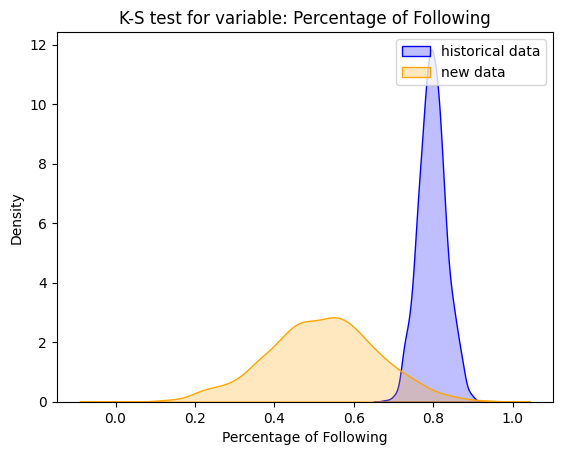

Para a variável 'Is Business Account', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.
O 'drift' de dados foi detectado para a variável: Is Business Account



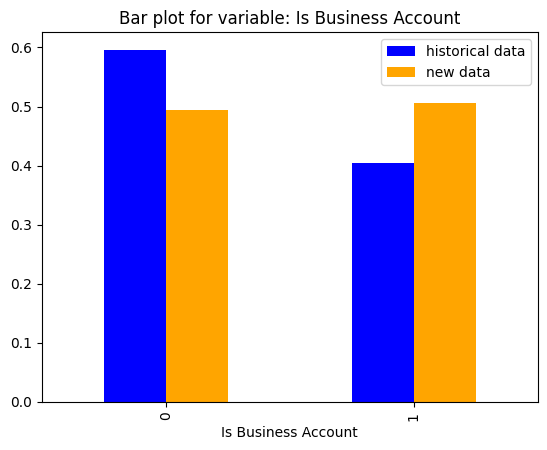

Para a variável 'Sex', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.
O 'drift' de dados foi detectado para a variável: Sex



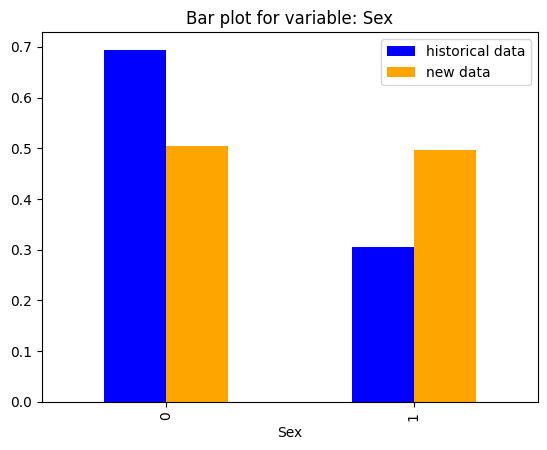

Para a variável 'Is Joined Recently', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.
O 'drift' de dados foi detectado para a variável: Is Joined Recently



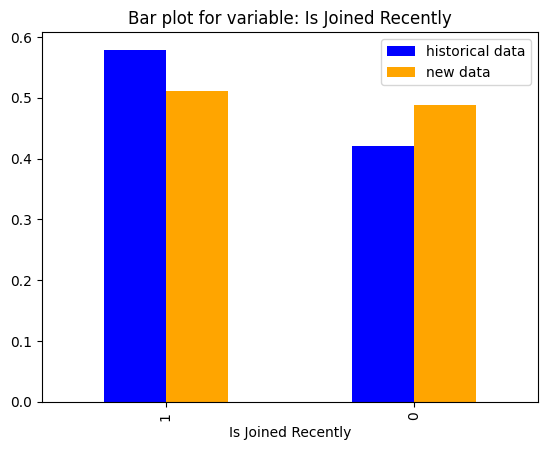

Para a variável 'Is Verified', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.
O 'drift' de dados foi detectado para a variável: Is Verified



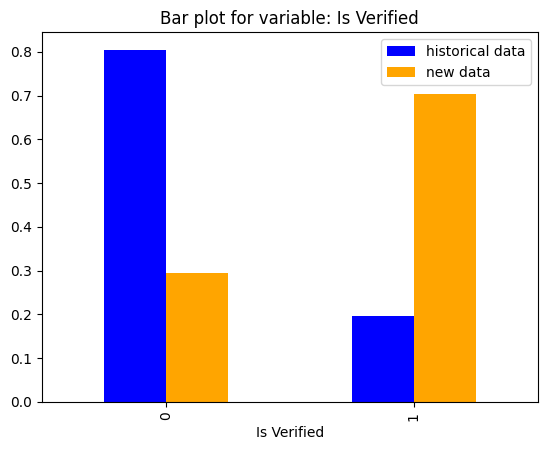

Para a variável 'Is Private', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.
O 'drift' de dados foi detectado para a variável: Is Private



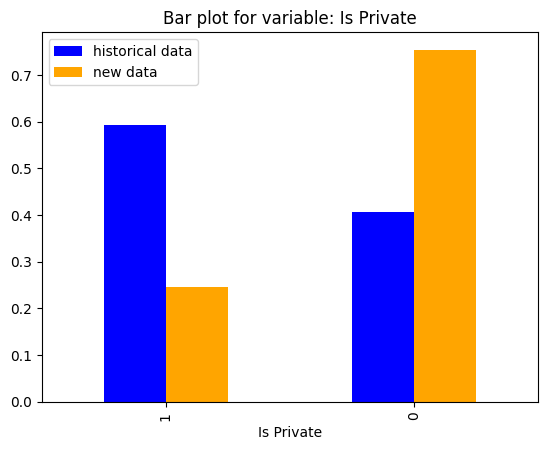

Para a variável 'Is Professional Account', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.
O 'drift' de dados foi detectado para a variável: Is Professional Account



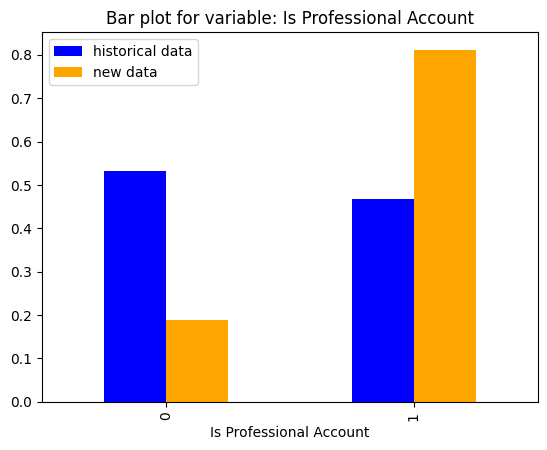

Para a variável 'Length of Biography', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.
O 'drift' de dados foi detectado para a variável: Length of Biography



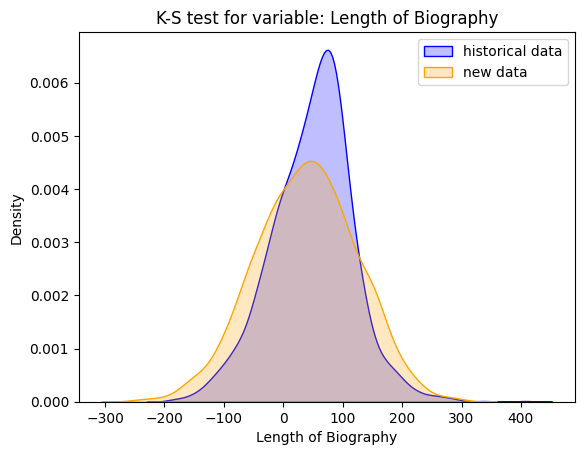

Para a variável 'Number of Video Posts', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.
O 'drift' de dados foi detectado para a variável: Number of Video Posts



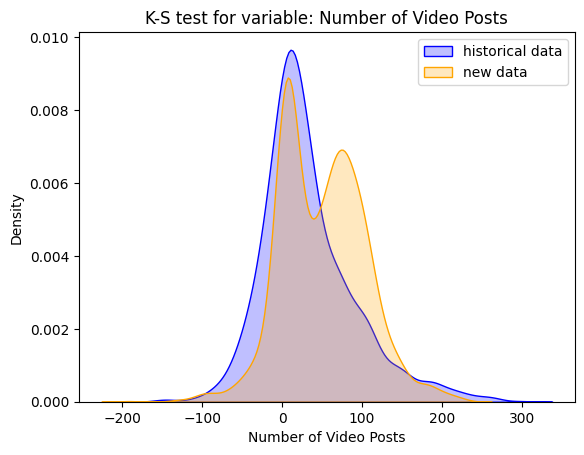

Para a variável 'Mean Post Likes', nós rejeitamos a hipótese nula (H0). Isso sugere que a distribuição desta variável mudou significativamente.
O 'drift' de dados foi detectado para a variável: Mean Post Likes



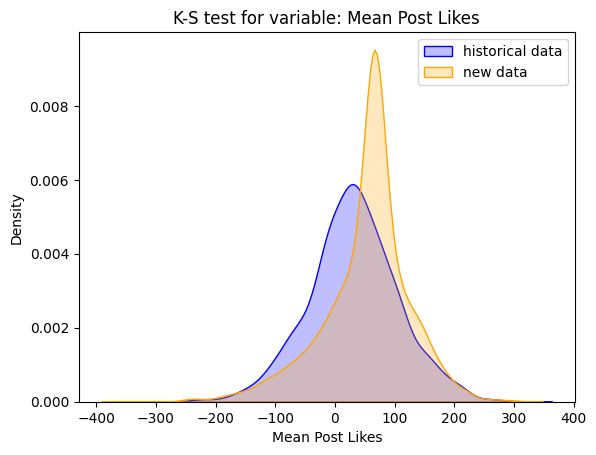

,Variable,Statistic,P-value,H0 Hypothesis
0,Length of Username,0.2270,1.453655e-45,Rejeita H0
1,Country Block_1,0.0560,3.770435e-03,Rejeita H0
2,Country Block_2,0.0380,1.113589e-01,Aceita H0
3,Number of Followers,0.9595,0.000000e+00,Rejeita H0
4,Number of Posts,0.9935,0.000000e+00,Rejeita H0
5,Number of Mutual Followers,0.9335,0.000000e+00,Rejeita H0
6,Percentage of Following,0.9170,0.000000e+00,Rejeita H0
7,Is Business Account,0.1015,2.184888e-09,Rejeita H0
8,Sex,0.1900,5.774494e-32,Rejeita H0
9,Is Joined Recently,0.0675,2.195342e-04,Rejeita H0


,Variable,Statistic,P-value,H0 Hypothesis
0,Length of Username,0.2270,1.453655e-45,Rejeita H0
1,Country Block_1,0.0560,3.770435e-03,Rejeita H0
3,Number of Followers,0.9595,0.000000e+00,Rejeita H0
4,Number of Posts,0.9935,0.000000e+00,Rejeita H0
5,Number of Mutual Followers,0.9335,0.000000e+00,Rejeita H0
6,Percentage of Following,0.9170,0.000000e+00,Rejeita H0
7,Is Business Account,0.1015,2.184888e-09,Rejeita H0
8,Sex,0.1900,5.774494e-32,Rejeita H0
9,Is Joined Recently,0.0675,2.195342e-04,Rejeita H0
10,Is Verified,0.5090,2.754109e-236,Rejeita H0


In [6]:

# Lista de variáveis para testar
variables_to_test = historical_data.columns.tolist()

# Remover a variável 'Class'
if 'Class' in variables_to_test:
    variables_to_test.remove('Class')

# Executar a função
results_df = perform_ks_test(historical_data, new_data, variables_to_test)

# Exibir o DataFrame
display(results_df)

# Exibir tabela de variáveis que rejeitam a hipótese nula
display(results_df[results_df['H0 Hypothesis'] == 'Rejeita H0'])

# Resolução do exercício 2

In [7]:
! pip install scikit-learn

In [8]:
import sklearn
print(sklearn.__version__)

1.2.2


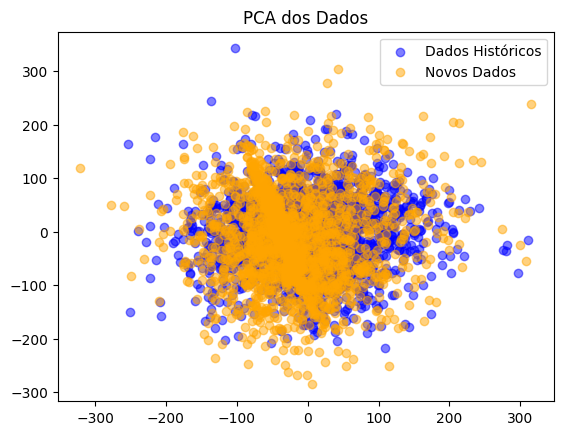

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Removendo a coluna 'Class' dos dados históricos
historical_data_without_class = historical_data.drop('Class', axis=1)

# Inicializando o PCA com 2 componentes
pca = PCA(n_components=2)

# Fazendo o PCA nos dados históricos
historical_data_pca = pca.fit_transform(historical_data_without_class)

# Fazendo o PCA nos novos dados
new_data_pca = pca.transform(new_data)

# Plotando os resultados
plt.scatter(historical_data_pca[:, 0], historical_data_pca[:, 1], color='blue', alpha=0.5, label='Dados Históricos')
plt.scatter(new_data_pca[:, 0], new_data_pca[:, 1], color='orange', alpha=0.5, label='Novos Dados')
plt.legend()
plt.title('PCA dos Dados')
plt.show()


A sobreposição dos novos dados no centro da nuvem de dados históricos, com uma borda de dados históricos não sobrepostos, sugere que os novos dados são consistentes com a tendência central dos dados históricos. No entanto, os dados mais extremos ou outliers dos dados históricos não estão sendo refletidos nos novos dados.

Isso pode ter várias interpretações, dependendo do contexto específico do problema:

Não há deriva de conceito significativa: Se a performance do modelo é majoritariamente determinada pelas tendências centrais dos dados, então este cenário sugere que não há deriva de conceito significativa acontecendo. Neste caso, o modelo treinado nos dados históricos provavelmente continuará a ter um bom desempenho nos novos dados.

Há deriva de conceito nas bordas da distribuição dos dados: Se a performance do modelo depende significativamente de como ele lida com casos extremos ou outliers, então este cenário sugere que uma deriva de conceito pode estar ocorrendo nessas regiões. Neste caso, o modelo treinado nos dados históricos pode não ter um desempenho adequado nos novos dados, já que as condições extremas não estão mais sendo observadas.

Essa análise baseia-se apenas na observação visual do PCA e faz suposições genéricas. Seria útil realizar análises adicionais, como comparar estatísticas descritivas ou realizar testes de hipótese para avaliar se a distribuição dos novos dados é significativamente diferente da distribuição dos dados históricos. Além disso, também pode ser útil realizar uma análise similar em cada variável individualmente, para verificar se alguma delas mostra sinais de deriva de conceito.

## Avlaiação de clusterização para avaliar se há Drift significativa com base em análise multivariada

e:\OneDrive\Documentos\GitHub\ML_MLOps\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


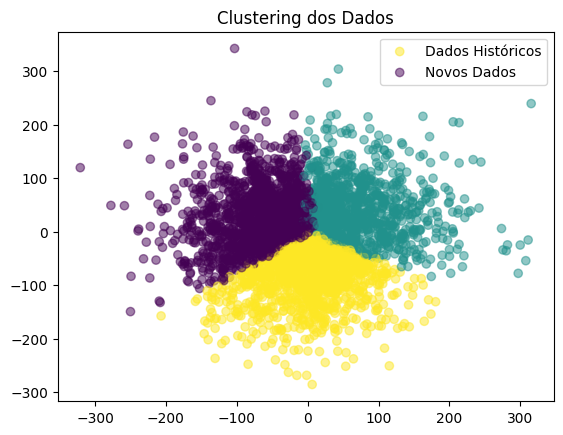

In [10]:
from sklearn.cluster import KMeans

# Vamos assumir que desejamos criar 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar o modelo aos dados históricos
kmeans.fit(historical_data_without_class)

# Agora vamos prever os clusters para ambos, dados históricos e novos dados
historical_data_clusters = kmeans.predict(historical_data_without_class)
new_data_clusters = kmeans.predict(new_data)

# Plotando os resultados
plt.scatter(historical_data_pca[:, 0], historical_data_pca[:, 1], c=historical_data_clusters, alpha=0.5, label='Dados Históricos')
plt.scatter(new_data_pca[:, 0], new_data_pca[:, 1], c=new_data_clusters, alpha=0.5, label='Novos Dados')
plt.legend()
plt.title('Clustering dos Dados')
plt.show()


e:\OneDrive\Documentos\GitHub\ML_MLOps\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


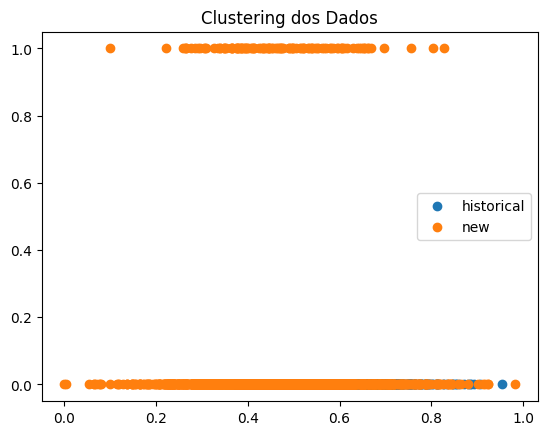

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Adicionar uma nova coluna 'origin' aos DataFrames
historical_data['origin'] = 'historical'
new_data['origin'] = 'new'

# Concatenar os dois DataFrames
combined_data = pd.concat([historical_data, new_data])

# Remover a coluna 'Class', se necessário
if 'Class' in combined_data.columns:
    combined_data = combined_data.drop('Class', axis=1)

# Realizar a análise de cluster
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(combined_data.drop('origin', axis=1))

# Adicionar os rótulos do cluster ao DataFrame
combined_data['cluster'] = kmeans.labels_

# Visualizar os resultados
for origin in ['historical', 'new']:
    plt.scatter(combined_data[combined_data['origin']==origin].iloc[:,0], 
                combined_data[combined_data['origin']==origin].iloc[:,1], 
                label=origin)
plt.legend()
plt.title('Clustering dos Dados')
plt.show()


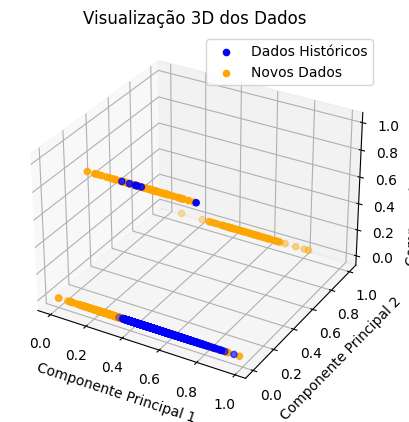

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# Crie uma figura e um objeto de eixos 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos dos dados históricos
ax.scatter(combined_data[combined_data['origin'] == 'historical'].iloc[:, 0],
           combined_data[combined_data['origin'] == 'historical'].iloc[:, 1],
           combined_data[combined_data['origin'] == 'historical'].iloc[:, 2],
           c='blue', label='Dados Históricos')

# Plotar os pontos dos novos dados
ax.scatter(combined_data[combined_data['origin'] == 'new'].iloc[:, 0],
           combined_data[combined_data['origin'] == 'new'].iloc[:, 1],
           combined_data[combined_data['origin'] == 'new'].iloc[:, 2],
           c='orange', label='Novos Dados')

# Definir rótulos dos eixos
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Definir título do gráfico
plt.title('Visualização 3D dos Dados')

# Mostrar a legenda
plt.legend()

# Mostrar o gráfico
plt.show()


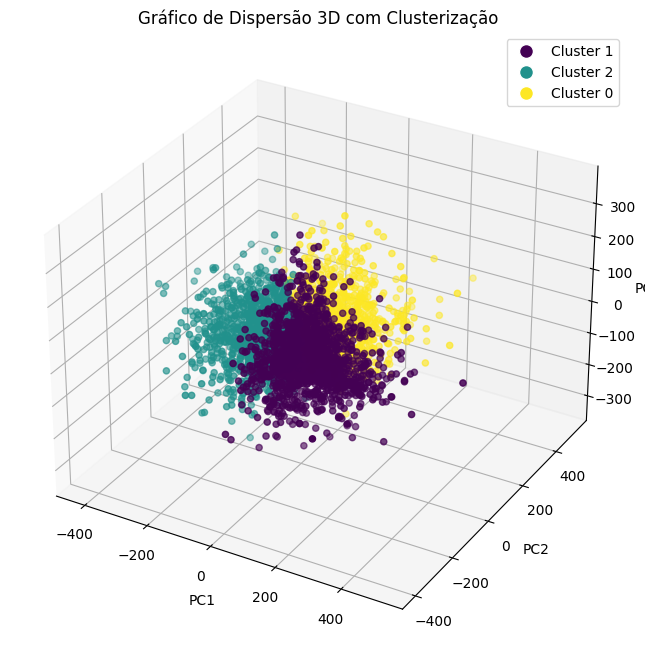

In [15]:
from matplotlib.lines import Line2D

# Realizar PCA nos dados combinados
pca = PCA(n_components=3)
componentes_principais = pca.fit_transform(combined_data.drop('origin', axis=1))

# Adicionar as colunas dos componentes principais ao DataFrame combined_data
combined_data['PC1'] = componentes_principais[:, 0]
combined_data['PC2'] = componentes_principais[:, 1]
combined_data['PC3'] = componentes_principais[:, 2]

# Extrair os valores dos três componentes principais
valores_pc1 = combined_data['PC1']
valores_pc2 = combined_data['PC2']
valores_pc3 = combined_data['PC3']

# Plotar o gráfico de dispersão 3D com os rótulos dos clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(valores_pc1, valores_pc2, valores_pc3, c=combined_data['cluster'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Gráfico de Dispersão 3D com Clusterização')

# Adicionar legenda para os rótulos dos clusters
labels_unicos = combined_data['cluster'].unique()
cores = plt.cm.viridis(np.linspace(0, 1, len(labels_unicos)))
elementos_legenda = [Line2D([0], [0], marker='o', color='w', markerfacecolor=cor, markersize=10, label=f'Cluster {label}') for label, cor in zip(labels_unicos, cores)]
ax.legend(handles=elementos_legenda)

plt.show()


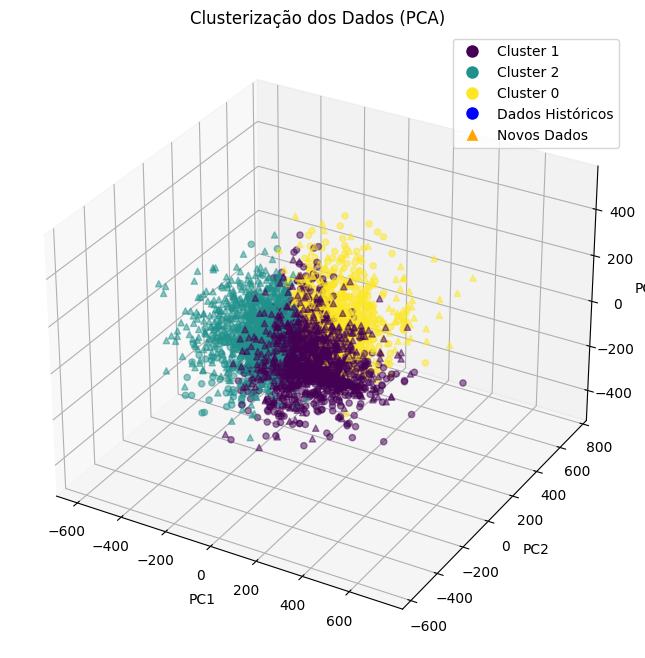

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definir cores para os clusters
labels_unicos = combined_data['cluster'].unique()
cores_clusters = plt.cm.viridis(np.linspace(0, 1, len(labels_unicos)))

# Plotar pontos históricos
historical_data_points = combined_data[combined_data['origin'] == 'historical']
ax.scatter(historical_data_points['PC1'], historical_data_points['PC2'], historical_data_points['PC3'], c=cores_clusters[historical_data_points['cluster']], marker='o', alpha=0.5, label='Dados Históricos')

# Plotar pontos novos
new_data_points = combined_data[combined_data['origin'] == 'new']
ax.scatter(new_data_points['PC1'], new_data_points['PC2'], new_data_points['PC3'], c=cores_clusters[new_data_points['cluster']], marker='^', alpha=0.5, label='Novos Dados')

# Adicionar legenda para os rótulos dos clusters
elementos_legenda = [Line2D([0], [0], marker='o', color='w', markerfacecolor=cor, markersize=10, label=f'Cluster {label}') for label, cor in zip(labels_unicos, cores_clusters)]
elementos_legenda += [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Dados Históricos'),
                      Line2D([0], [0], marker='^', color='w', markerfacecolor='orange', markersize=10, label='Novos Dados')]
ax.legend(handles=elementos_legenda)

# Configurar rótulos dos eixos
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('Clusterização dos Dados (PCA)')
plt.show()




In [18]:
from scipy.stats import f_oneway

def detect_concept_drift(historical_data, new_data, significance_level=0.05):
    p_values = perform_manova(historical_data, new_data)
    drift_detected = [p < significance_level for p in p_values]
    return drift_detected

def perform_manova(df1, df2):
    p_values = []
    common_columns = set(df1.columns) & set(df2.columns)  # Obter apenas as colunas em comum
    for column in common_columns:
        if column not in ['Class', 'origin']:  # Excluir as colunas 'Class' e 'origin'
            statistic, p_value = f_oneway(df1[column], df2[column])
            p_values.append(p_value)
    return p_values


In [21]:

# Aplicando as funções nos dados históricos e novos dados
drift_detected = detect_concept_drift(historical_data.drop(['Class'], axis=1), new_data)

# Obtendo as variáveis que apresentaram "concept drift"
variables_with_drift = historical_data.drop(['Class', 'origin'], axis=1).columns[drift_detected]

# Verificando se o retreino do modelo é necessário
if len(variables_with_drift) > 0:
    print("Foi detectado 'concept drift' nas seguintes variáveis:")
    print(variables_with_drift)
    print("Recomenda-se o retreino do modelo.")
else:
    print("Não foi detectado 'concept drift' significativo. O retreino do modelo pode não ser necessário.")


Foi detectado 'concept drift' nas seguintes variáveis:
Index(['Length of Username', 'Country Block_1', 'Country Block_2',
       'Number of Followers', 'Number of Posts', 'Number of Mutual Followers',
       'Percentage of Following', 'Is Business Account', 'Sex',
       'Is Joined Recently', 'Is Verified', 'Is Private',
       'Is Professional Account', 'Length of Biography',
       'Number of Video Posts', 'Mean Post Likes'],
      dtype='object')
Recomenda-se o retreino do modelo.
